# Input Descriptions
#### x	State vector (what we estimate, e.g., [position, velocity])	(n × 1)
#### F	State transition (how the state evolves)	(n × n)
#### H	Observation (how states map to measurements)	(m × n)
#### P	State covariance (uncertainty in our estimate)	(n × n)
#### Q	Process noise (how much we distrust the model)	(n × n)
#### R	Measurement noise (how much we distrust sensors)	(m × m)
#### K	Kalman Gain (weights measurements vs. predictions)	(n × m)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import sqrtm
plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline

In [8]:
dt = 0.1
n_steps = 100

# True states (circular motion)
true_states = np.zeros((n_steps, 4))  # [x, y, vx, vy]
true_states[0] = [0, 0, 1, 0.5]  # Initial state

for t in range(1, n_steps):
    x, y, vx, vy = true_states[t-1]
    ax, ay = -0.1*vx, -0.1*vy  # Centripetal acceleration
    true_states[t] = [
        x + vx*dt, 
        y + vy*dt,
        vx + ax*dt,
        vy + ay*dt
    ]

# Noisy measurements (only x and y positions)
H = np.array([[1, 0, 0, 0], [0, 1, 0, 0]])  # Observe only position
R = np.array([[0.5, 0.2], [0.2, 0.5]])  # Measurement noise
measurements = (H @ true_states.T).T + np.random.multivariate_normal(
    [0, 0], R, n_steps
)

# ===== 3. Run Kalman Filter =====
# Initialize matrices
F = np.array([
    [1, 0, dt, 0],
    [0, 1, 0, dt],
    [0, 0, 1, 0],
    [0, 0, 0, 1]
])
Q = np.eye(4) * 0.01  # Small process noise
P = np.eye(4) * 10    # High initial uncertainty

In [9]:
from mkf import MultivariateKalmanFilter

kf = MultivariateKalmanFilter(F, H, Q, R, P, x0)

estimates = []

for z in measurements:
    kf.predict()
    estimates.append(kf.update(z))
estimates = np.array(estimates)

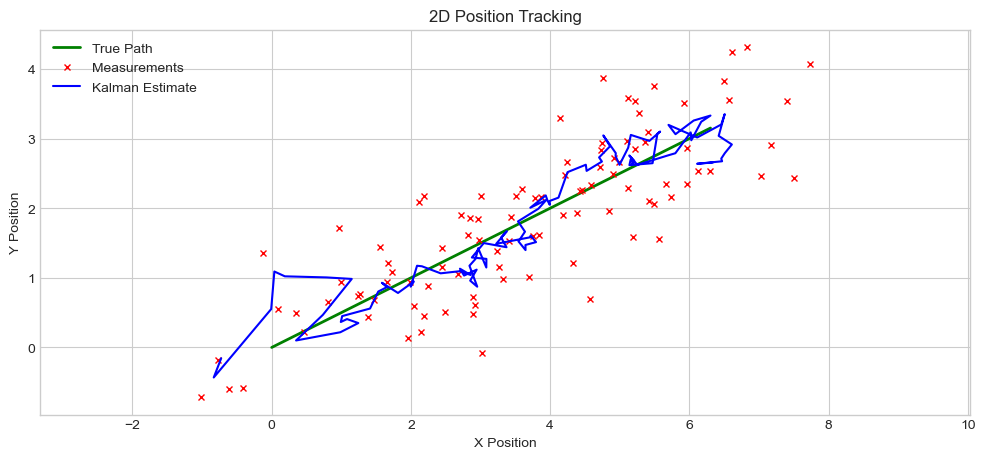

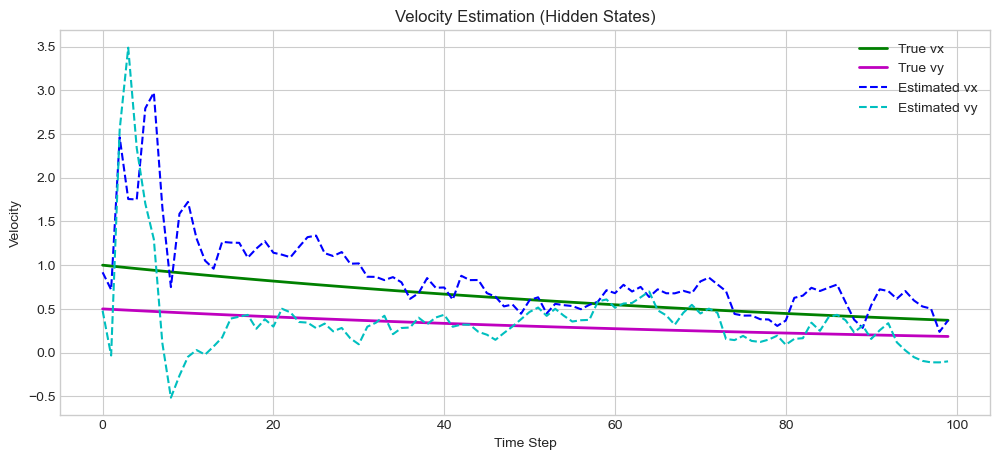

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(true_states[:, 0], true_states[:, 1], 'g-', label='True Path', linewidth=2)
plt.plot(measurements[:, 0], measurements[:, 1], 'rx', label='Measurements', markersize=4)
plt.plot(estimates[:, 0], estimates[:, 1], 'b-', label='Kalman Estimate')
plt.title("2D Position Tracking")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.legend()
plt.axis('equal')
plt.show()

# Plot velocity estimates (hidden states)
plt.figure(figsize=(12, 5))
plt.plot(true_states[:, 2], 'g-', label='True vx', linewidth=2)
plt.plot(true_states[:, 3], 'm-', label='True vy', linewidth=2)
plt.plot(estimates[:, 2], 'b--', label='Estimated vx')
plt.plot(estimates[:, 3], 'c--', label='Estimated vy')
plt.title("Velocity Estimation (Hidden States)")
plt.xlabel("Time Step")
plt.ylabel("Velocity")
plt.legend()
plt.show()